# Google Colab:

We utilize Google Colab for processing large datasets due to its Software as a Service (SaaS) nature provided by Google. With Google Colab, we can avoid the need for infrastructure maintenance, making it a hassle-free solution for our project. Its ease of use and seamless integration with other Google services make it a convenient choice for implementing our data processing tasks. Additionally, Google Colab provides powerful computational resources, including GPU and TPU support, enabling us to efficiently handle the computational demands of big data analytics without worrying about hardware constraints.


#pyspark library
For this project, we require several libraries, one of which is PySpark. PySpark is a library designed for big data analytics, utilizing the map-reduce paradigm, which aligns perfectly with the requirements of our task.

PySpark offers a powerful interface to Apache Spark, a distributed computing framework, enabling efficient processing of large-scale datasets. By leveraging PySpark, we can harness the capabilities of Apache Spark to handle complex data processing tasks with ease.

To begin using PySpark, it's necessary to have Apache Spark installed on your system and properly configured to work with Python. Once the setup is complete, PySpark can be installed using the following pip command:

bash
Copy code
pip install pyspark
After installing PySpark, we can proceed to write PySpark code for data analysis and processing. Below is a basic example illustrating how PySpark can be utilized for data analysis:

In [1]:
!pip install pyspark
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=318157818eed5ce4cd7434fc83b07c126c55a0b238810dacd110220d112c01f1
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


# Project Libraries

## Processing Libraries:
1. **Pandas:** Pandas is a powerful library for data manipulation and analysis in Python, offering data structures and functions to efficiently handle structured data.
2. **NumPy:** NumPy provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays, making it a fundamental library for numerical computing.

## Visualization Libraries:
1. **Matplotlib:** Matplotlib is a versatile plotting library in Python, enabling the creation of static, interactive, and animated visualizations, suitable for a wide range of data visualization needs.
2. **Seaborn:** Seaborn is built on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics. It simplifies the process of generating complex visualizations, especially for statistical data analysis.

## Statistical Analysis Library:
1. **SciPy:** SciPy is an open-source library that builds upon NumPy and provides additional functionality for scientific and technical computing. It includes modules for optimization, integration, interpolation, and statistical analysis, facilitating a rigorous and scientific approach to data analysis.



In [2]:
import pandas as pd  # Imports the pandas library and aliases it as 'pd'. Pandas is commonly used for data manipulation and analysis in Python.

import numpy as np  # Imports the numpy library and aliases it as 'np'. Numpy provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

import matplotlib.pyplot as plt  # Imports the pyplot module from the matplotlib library and aliases it as 'plt'. Matplotlib is a plotting library in Python, and pyplot provides a MATLAB-like interface for creating plots and visualizations.

import seaborn as sns  # Imports the seaborn library for statistical data visualization. Seaborn is built on top of matplotlib and provides a high-level interface for creating attractive and informative statistical graphics.

from scipy import stats  # Imports the stats module from the scipy library. Scipy is an open-source library for mathematics, science, and engineering, and the stats module provides functions for statistical analysis and computations.



# Making a Session

For using Apache Spark, we need to create a session.


In [3]:
# Setting up a SparkSession with local execution mode and all available CPU cores
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Setting a Spark configuration to enable eager evaluation of Spark SQL queries in the REPL environment
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)



# Importing Data:

To import data, we upload data using Google Drive and then read the data.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Data

The uploaded file can be read using these functions.


In [6]:
# Import the necessary module (presumably Spark is already imported)

# Read the CSV file 'Hospital_Admissions_Time_Series_2015.csv' into a Spark DataFrame named 'Time'
Time = spark.read.csv('drive/MyDrive/Alcohol data/Hospital_Admissions_Time_Series_2015.csv', header=True, sep=",")

# Read the CSV file 'Hospital_Admissions_Region_LA_2015.csv' into a Spark DataFrame named 'region'
region = spark.read.csv('drive/MyDrive/Alcohol data/Hospital_Admissions_Region_LA_2015.csv', header=True, sep=",")

# Read the CSV file 'Hospital_Admissions_Age_Gender_2015.csv' into a Spark DataFrame named 'age_gender'
age_gender = spark.read.csv('drive/MyDrive/Alcohol data/Hospital_Admissions_Age_Gender_2015.csv', header=True, sep=",")



Time, region, and age_gender are variables assigned to Spark DataFrames.

The `spark.read.csv()` function is used to read CSV files. The arguments passed to `spark.read.csv()`:
- The first argument is the file path of the CSV file to be read.
- `header=True` indicates that the first row of the CSV file contains column headers.
- `sep=","` specifies that a comma is used as the delimiter between columns in the CSV file.

The resulting DataFrames are named Time, region, and age_gender based on the content of each CSV file.

These DataFrames can be further processed and analyzed using Spark's functionalities for data manipulation and transformation.


# Data Descriptions

## Hospital_Admissions_Age_Gender_2015
- **Year:** Financial year within which the episode finished  2013/2014

- **ICD10_Code and ICD10_Description:** Syndrome codes and their descriptions.

- **Classification:** Recorded classification method.

- **Metric_Primary:**
-- *Higher level grouping of ICD-10 codes*
-- *Mental and behavioural disorders due to use of alcohol*
-- *Alcoholic liver disease*
-- *Toxic effect of alcohol*
-- *Other*
-- *Infectious and parasitic diseases*
-- *Cancer*
-- *Diseases of the nervous system*
-- *Cardiovascular disease*
-- *Respiratory infections*
-- *Digestive disease*
-- *Pregnancy and childbirth*
-- *Unintentional injuries*
-- *Intentional injuries.*

- **Metric_Secondary1:** Major condition types.

- **Metric_Tertiary:** Gender categories: female, male, and all persons.

- **Metric_Quaternary:** Age groups: All ages, Under 16, 16-24, 25-34, 35-44, 45-54, 55-64, 65-74, 75+.

- **Value:** Number of admissions in the selected metrics combination (rounded to the nearest 10).

## Hospital_Admissions_Time_Series_2015
The columns have similar attributes and descriptions.

- **Year:** Financial year within which the episode finished  spans from 2003/2004 to 2014/2015.

## Hospital_Admissions_Region_LA_2015
- ** year** Financial year within which the episode finished  spans from 2012/2013 to 2013/2014

- **ONS_Code:** ONS nine-character geographic code.

- **County_Code:** Upper tier of geographical locations.

- **District_Code:** Lower tier of geographical locations.

- **Name:** Text description for the ONS_Code to make it more readable.


In [7]:
Time.show(5)
region.show(5)
age_gender.show(5)

+-------+----------+--------------------+--------------+--------------------+-------------------+-----+
|   Year|ICD10_Code|   ICD10_Description|Classification|      Metric_Primary|   Metric_Secondary|Value|
+-------+----------+--------------------+--------------+--------------------+-------------------+-----+
|2013/14|     F10.0|  Acute intoxication|         Broad|Mental and behavi...|Wholly attributable|54730|
|2013/14|     F10.1|         Harmful use|         Broad|Mental and behavi...|Wholly attributable|65470|
|2013/14|     F10.2| Dependence syndrome|         Broad|Mental and behavi...|Wholly attributable|55120|
|2013/14|     F10.3|    Withdrawal state|         Broad|Mental and behavi...|Wholly attributable|24600|
|2013/14|     F10.4|Withdrawal state ...|         Broad|Mental and behavi...|Wholly attributable| 1110|
+-------+----------+--------------------+--------------+--------------------+-------------------+-----+
only showing top 5 rows

+-------+---------+-----------+--------

In [8]:
Time.printSchema()
region.printSchema()
age_gender.printSchema()

root
 |-- Year: string (nullable = true)
 |-- ICD10_Code: string (nullable = true)
 |-- ICD10_Description: string (nullable = true)
 |-- Classification: string (nullable = true)
 |-- Metric_Primary: string (nullable = true)
 |-- Metric_Secondary: string (nullable = true)
 |-- Value: string (nullable = true)

root
 |-- Year: string (nullable = true)
 |-- ONS_Code: string (nullable = true)
 |-- County_Code: string (nullable = true)
 |-- District_Code: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Classification: string (nullable = true)
 |-- Metric_Primary: string (nullable = true)
 |-- Value: string (nullable = true)

root
 |-- Year: string (nullable = true)
 |-- ICD10_Code: string (nullable = true)
 |-- ICD10_Description: string (nullable = true)
 |-- Classification: string (nullable = true)
 |-- Metric_Primary: string (nullable = true)
 |-- Metric_Secondary: string (nullable = true)
 |-- Metric_Tertiary: string (nullable = true)
 |-- Metric_Quaternary: string (null

# Making a Database

With the CSV files we downloaded, we can now create a database using PySpark.


In [9]:
# Create temporary views for the DataFrames
Time.createOrReplaceTempView("time")
region.createOrReplaceTempView("region")
age_gender.createOrReplaceTempView("age_gender")



`createOrReplaceTempView()` is a method used in Apache Spark to create or replace a temporary view from a DataFrame.

Temporary views allow you to run SQL queries against DataFrames using Spark SQL.

The method takes a string argument which specifies the name of the temporary view. In this case, the temporary views are named "time", "region", and "age_gender", respectively, which corresponds to the names of the DataFrames.

Once these temporary views are created, you can query them using SQL statements, enabling more complex data analysis and manipulation tasks.


# Create temporary views for the DataFrames

The tables and views we have created are now available for querying the system. By querying the system, we can retrieve suitable and accurate data. For analytics purposes, we can convert Spark DataFrames to Pandas DataFrames.


In [10]:
# Execute SQL queries on temporary views and convert the results to Pandas DataFrames
time_df = spark.sql("""
    SELECT
        Year,                                        -- Select the Year column
        SUM(Value) AS sum_value_per_year,            -- Calculate the sum of the Value column
        Metric_Primary                               -- Select the Metric_Primary column
    FROM
        time                                         -- From the time table
    GROUP BY
        Year, Metric_Primary                         -- Group by Year and Metric_Primary
""")

time_df = time_df.toPandas()



regions = "'NORTH WEST', 'SOUTH EAST', 'EAST OF ENGLAND', 'NORTH EAST', 'WEST OF ENGLAND', 'ENGLAND','SOUTH WEST'"

region_df = spark.sql(f"""
    SELECT SUM(Value) AS sum_value_per_region, Name, Metric_Primary
    FROM region
    WHERE Metric_Primary IN ('Female', 'Male')
        AND (
            LOWER(TRIM(Name)) IN (
                SELECT LOWER(TRIM(Name))
                FROM region
                WHERE LOWER(TRIM(Name)) NOT IN ({regions.lower()})
                GROUP BY Name
                ORDER BY SUM(Value) DESC LIMIT 10
            )
            OR LOWER(TRIM(Name)) IN ({regions.lower()})
        )
    GROUP BY Name, Metric_Primary
    ORDER BY sum_value_per_region
""")
region_df = region_df.toPandas()

age_gender_df = spark.sql("""
    SELECT
        Metric_Primary,                                             -- Select the Metric_Primary column
        Metric_Tertiary,                                            -- Select the Metric_Tertiary column
        Metric_Quaternary,                                          -- Select the Metric_Quaternary column
        SUM(Value) AS sum_value_for_age_gender_group                -- Calculate the sum of the Value column
    FROM
        age_gender                                                  -- From the age_gender table
    WHERE
        Metric_Tertiary != 'All persons'                            -- Filter out 'All persons' from Metric_Tertiary
        AND Metric_Quaternary != 'All ages'                         -- Filter out 'All ages' from Metric_Quaternary
    GROUP BY
        Metric_Primary,                                             -- Group by Metric_Primary
        Metric_Tertiary,                                            -- Group by Metric_Tertiary
        Metric_Quaternary                                           -- Group by Metric_Quaternary
""")



age_gender_df = age_gender_df.toPandas()



The `spark.sql()` method is used to execute SQL queries on the temporary views created earlier.
The results of the SQL queries are stored in Spark DataFrames.
The `.toPandas()` method is applied to convert these Spark DataFrames into Pandas DataFrames for easier manipulation and analysis using Pandas functionalities.
Each query performs different aggregations and filtering operations on the data, extracting insights based on specific criteria from the original datasets.
The resulting Pandas DataFrames `time_df`, `region_df`, and `age_gender_df` hold the aggregated data based on the specified conditions, ready for further analysis or visualization.


## DataFrame Overview

Here are the DataFrames we have created: we can now see them


In [11]:
region_df

,sum_value_per_region,Name,Metric_Primary
0,17330.0,Norfolk,Female
1,18500.0,Birmingham,Female
2,19770.0,Hampshire,Female
3,22830.0,Essex,Female
4,23070.0,Kent,Female
5,24320.0,Lancashire,Female
6,30330.0,Norfolk,Male
7,34270.0,Hampshire,Male
8,34420.0,Birmingham,Male
9,39100.0,Essex,Male


In [12]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sum_value_per_region  32 non-null     float64
 1   Name                  32 non-null     object 
 2   Metric_Primary        32 non-null     object 
dtypes: float64(1), object(2)
memory usage: 896.0+ bytes


In [13]:
Time

Year,ICD10_Code,ICD10_Description,Classification,Metric_Primary,Metric_Secondary,Value
2013/14,F10.0,Acute intoxication,Broad,Mental and behavi...,Wholly attributable,54730
2013/14,F10.1,Harmful use,Broad,Mental and behavi...,Wholly attributable,65470
2013/14,F10.2,Dependence syndrome,Broad,Mental and behavi...,Wholly attributable,55120
2013/14,F10.3,Withdrawal state,Broad,Mental and behavi...,Wholly attributable,24600
2013/14,F10.4,Withdrawal state ...,Broad,Mental and behavi...,Wholly attributable,1110
2013/14,F10.5,Psychotic disorder,Broad,Mental and behavi...,Wholly attributable,350
2013/14,F10.6,Amnesic syndrome,Broad,Mental and behavi...,Wholly attributable,1590
2013/14,F10.7,Residual and late...,Broad,Mental and behavi...,Wholly attributable,710
2013/14,F10.8,Other mental and ...,Broad,Mental and behavi...,Wholly attributable,50
2013/14,F10.9,Unspecified menta...,Broad,Mental and behavi...,Wholly attributable,720


In [14]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                143 non-null    object 
 1   sum_value_per_year  143 non-null    float64
 2   Metric_Primary      143 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


In [15]:
age_gender

Year,ICD10_Code,ICD10_Description,Classification,Metric_Primary,Metric_Secondary,Metric_Tertiary,Metric_Quaternary,Value
2013/14,F10.0,Acute intoxication,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,54730
2013/14,F10.1,Harmful use,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,65470
2013/14,F10.2,Dependence syndrome,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,55120
2013/14,F10.3,Withdrawal state,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,24600
2013/14,F10.4,Withdrawal state ...,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,1110
2013/14,F10.5,Psychotic disorder,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,350
2013/14,F10.6,Amnesic syndrome,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,1590
2013/14,F10.7,Residual and late...,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,710
2013/14,F10.8,Other mental and ...,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,50
2013/14,F10.9,Unspecified menta...,Broad,Mental and behavi...,Wholly attributable,All persons,All ages,720


In [16]:
age_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Metric_Primary                  208 non-null    object 
 1   Metric_Tertiary                 208 non-null    object 
 2   Metric_Quaternary               208 non-null    object 
 3   sum_value_for_age_gender_group  183 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.6+ KB


# Data Processing

We have the data in years, but we need to convert the years into a format understandable by the machine.


In [17]:
# Extract the year part before the '/'
time_df['Year'] = time_df['Year'].str.split('/').str[0]
time_df = time_df.sort_values(['Year', 'Metric_Primary'])

# Convert the year column to date format
# time_df['Year'] = pd.to_datetime(time_df['Year'])

**Data Processing**

Here's how we process the data in the 'Year' column:

- `time_df['Year'].str.split('/')` splits each element in the 'Year' column by '/'.
- `str[0]` selects the first part of the split, which represents the year. This effectively extracts the year part before the '/'.
- `pd.to_datetime()` function is then used to convert the 'Year' column to datetime format, enabling easy manipulation and analysis of dates.


# Data Visualizations and Scientific Approach

Now, we can visualize the data and analyze the time series trends over the assessed time period to identify any raised side effects.


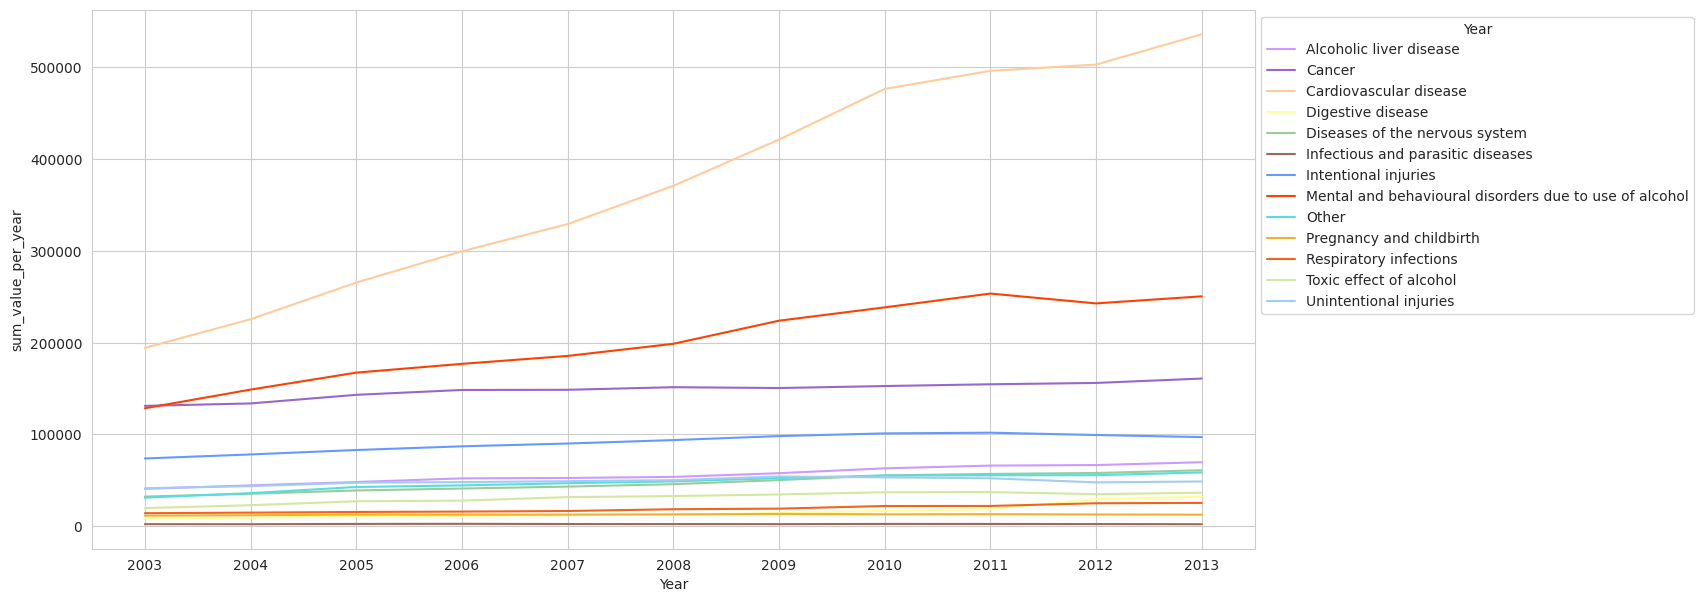

<class 'pandas.core.series.Series'>
Index: 143 entries, 72 to 134
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
143 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [18]:
colors = [
    '#CC99FF',
    '#9966CC',
    '#FFCC99',
    '#FFFF99',
    '#99CC99',
    '#9D695A',
    '#6699FF',
    '#FC4100',
    '#55DDE0',
    '#F6AE2D',
    '#F26419',
    '#D4E79E',
    '#A1CDF1',]

# Set Seaborn style and color palette
sns.set_style("whitegrid")


# Create a larger figure
plt.figure(figsize=(15, 7))  # Adjust the size as needed

# Create the line plot with hue
sns.lineplot(x=time_df['Year'],
             y=time_df['sum_value_per_year'],
             hue=time_df["Metric_Primary"],
             errorbar=None,
             palette=colors,)

# Adjust the legend
plt.legend(title="Year", bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.show()

time_df['Year'].info()

`sns.set_style("whitegrid")` sets the Seaborn style to "whitegrid", providing a white background with grid lines.

`plt.figure(figsize=(15, 7))` creates a larger figure with a size of 15x7 inches to accommodate the plot.

`sns.lineplot()` creates a line plot with the specified x-axis, y-axis, and hue (color) based on the 'Year' and 'Metric_Primary' columns of the DataFrame `time_df`. `errorbar=None` removes error bars from the plot.

`plt.legend(title="Metric Primary", loc="upper left")` adjusts the legend title and position.

`plt.show()` displays the plot.

##Bar graph different yearly



In [19]:
diff_total = time_df.groupby(['Metric_Primary', 'Year']).sum()['sum_value_per_year'].agg('diff').reset_index()

diff_total = diff_total[diff_total.Year != '2003']

diff_total

,Metric_Primary,Year,sum_value_per_year
1,Alcoholic liver disease,2004,3700.0
2,Alcoholic liver disease,2005,3680.0
3,Alcoholic liver disease,2006,3980.0
4,Alcoholic liver disease,2007,430.0
5,Alcoholic liver disease,2008,1180.0
...,...,...,...
138,Unintentional injuries,2009,3990.0
139,Unintentional injuries,2010,-950.0
140,Unintentional injuries,2011,-1020.0
141,Unintentional injuries,2012,-4440.0


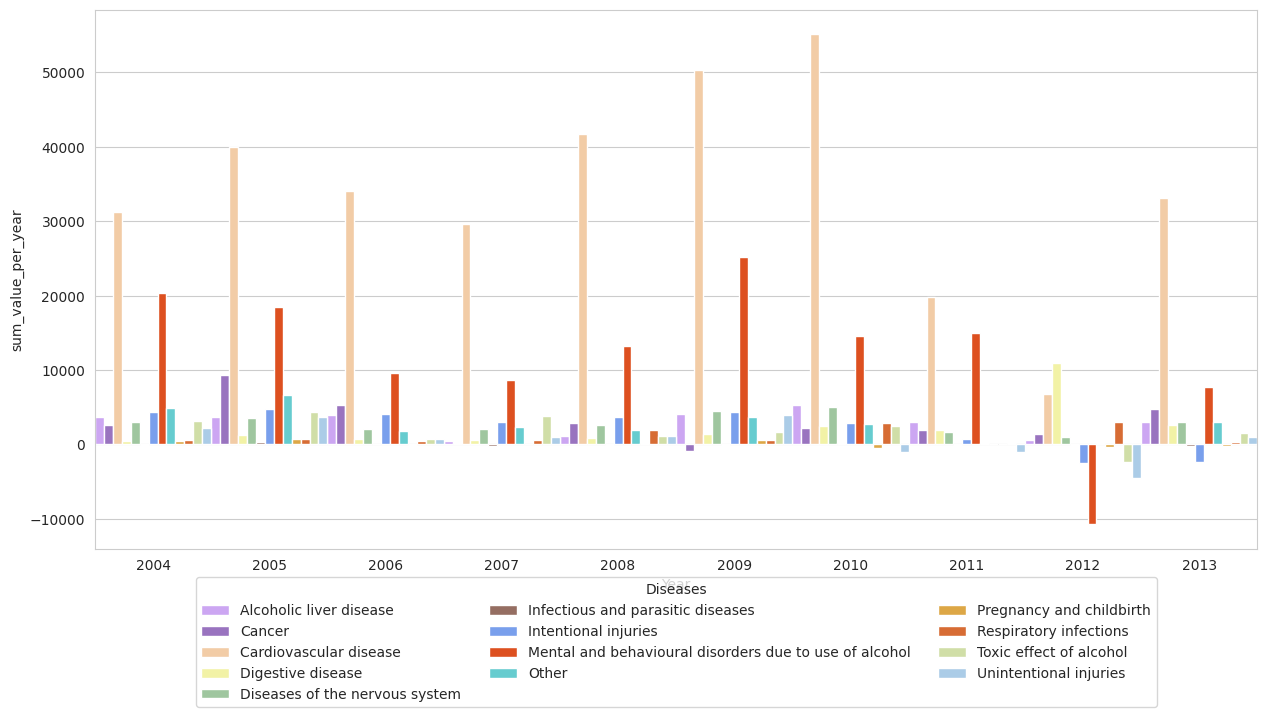

In [20]:
# pivot_time = pd.pivot_table(time_df,index='Metric_Primary',columns='Year',values='sum_value_per_year',aggfunc=np.sum)

# Set Seaborn style and color palette
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(15, 7))  # Adjust the size as needed

# Create the line plot with hue
sns.barplot(x=diff_total['Year'],
             y=diff_total['sum_value_per_year'],
             hue=diff_total["Metric_Primary"],
             palette=colors,
             width=1)

# Adjust the legend
plt.legend(title="Diseases", loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=3)

# Display the plot
plt.show()

# The Admissions per Regions

Now that we have a clear view of the time period where side effects have increased, we can investigate which regions and areas have a higher rate for both genders. Additionally, we can identify the top 10 records for cities and 6 regions of overall admissions for both females and males, comparing them to the average consumption for regions and cities.



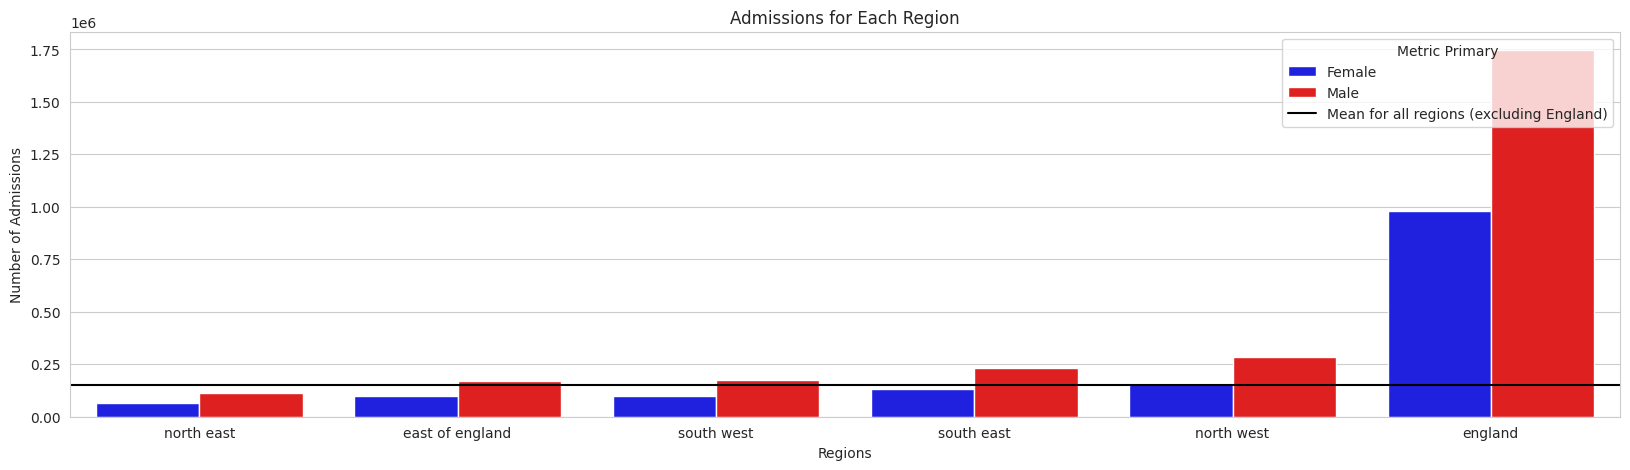

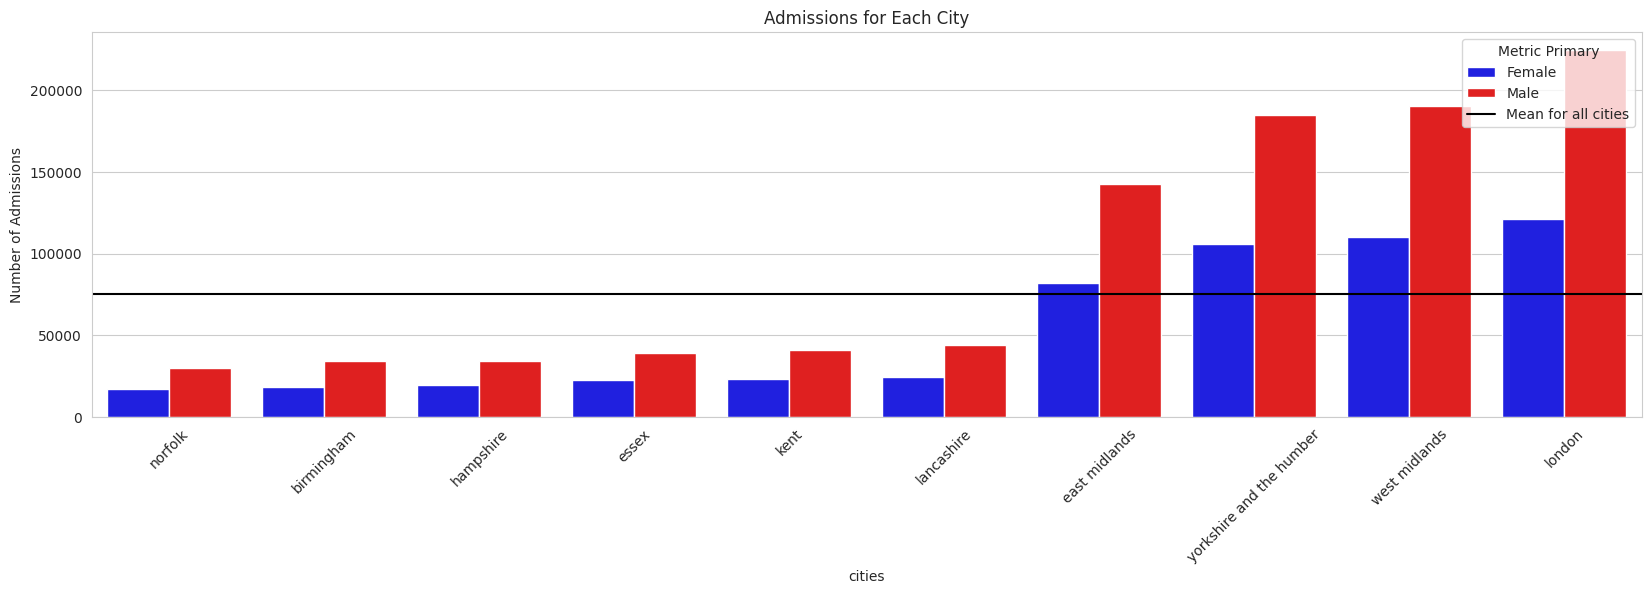

In [21]:
# Set Seaborn style and color palette
sns.set_style("whitegrid")
custom_palette = sns.color_palette(["blue", "red"])  # Define your custom color palette with blue and red
sns.set_palette(custom_palette)

# Create a larger figure for the first bar plot
plt.figure(figsize=(20, 5))

# Normalize region names in 'areas' and 'cities' dataframes
region_df['Name'] = region_df['Name'].str.strip().str.lower()
area_names = ['north west', 'south east', 'east of england', 'north east', 'west of england', 'england','south west']
areas = region_df[region_df['Name'].isin(area_names)]
cities = region_df[~region_df['Name'].isin(area_names)]

# Create the bar plot for areas
sns.barplot(x=areas['Name'],
            y=areas['sum_value_per_region'],
            hue=areas["Metric_Primary"],
            errorbar=None)

# Add a horizontal line for the mean value of all regions
plt.axhline(y=np.mean(areas[areas['Name'] != 'england']['sum_value_per_region']), color='black', linestyle='-', label='Mean for all regions (excluding England)')



# Adjust the legend
plt.legend(title="Metric Primary", loc="upper right")

plt.xlabel('Regions')
plt.ylabel('Number of Admissions')
plt.title('Admissions for Each Region')

# Show the plot
plt.show()

# Create a larger figure for the second bar plot
plt.figure(figsize=(20, 5))

# Create the bar plot for cities
sns.barplot(x=cities['Name'],
            y=cities['sum_value_per_region'],
            hue=cities["Metric_Primary"],
            errorbar=None)

# Add a horizontal line for the mean value of all regions
plt.axhline(y=np.mean(cities['sum_value_per_region']), color='black', linestyle='-', label='Mean for all cities')

# Adjust the legend
plt.legend(title="Metric Primary", loc="upper right")

plt.xlabel('cities')
plt.ylabel('Number of Admissions')
plt.title('Admissions for Each City')
plt.xticks(rotation=45)

# Show the plot
plt.show()


`sns.set_style("whitegrid")` sets the Seaborn style to "whitegrid" for both plots.

A `custom_palette` is defined to create a custom color palette with blue and red colors.

`sns.set_palette(custom_palette)` sets the color palette for both plots.

Two larger figures are created using `plt.figure(figsize=(20, 5))` to adjust the size of the plots.

Region names in the `region_df` DataFrame are normalized by stripping whitespace and converting to lowercase.

`area_names` and `areas` are defined by filtering regions based on specific names.

Bar plots are created for both `areas` and `cities` DataFrames using `sns.barplot()`.

Horizontal lines are added to both plots to represent the mean value of admissions across all regions or cities.

Legends, labels, and titles are adjusted for both plots to provide clear information.

`plt.xticks(rotation=45)` is used to rotate the x-axis labels of the second plot for better readability.

## The Information We Get

From this bar chart, we can observe that:
- The overall number of admissions in England is significantly high.
- The North West and South East regions have the highest number of admissions.
- The cities of London, West Midlands, Yorkshire and Humber, and Midlands are outstanding for the number of admissions.


#Analysis of Demographic Patterns (FY 2013/14)

From the time-series graph above, we figured out that `Cardiovascular disease` and `Mental and behavioural disorders due to use of alcohol` have the highest rates of hospital admission rates that significantly increase over time. Therefore, we plot 2 graphs representing these health issues against age and gender.

##Cardiovascular disease

In [27]:
#filter dataframe
cardiovascular = age_gender_df[age_gender_df['Metric_Primary'] == 'Cardiovascular disease']
print(cardiovascular)

             Metric_Primary Metric_Tertiary Metric_Quaternary  \
4    Cardiovascular disease          Female             55-64   
8    Cardiovascular disease          Female             45-54   
11   Cardiovascular disease          Female               75+   
16   Cardiovascular disease            Male             25-34   
37   Cardiovascular disease          Female          Under 16   
39   Cardiovascular disease          Female             65-74   
64   Cardiovascular disease            Male             65-74   
69   Cardiovascular disease            Male             35-44   
88   Cardiovascular disease            Male          Under 16   
104  Cardiovascular disease            Male             16-24   
109  Cardiovascular disease            Male             55-64   
125  Cardiovascular disease          Female             35-44   
147  Cardiovascular disease          Female             16-24   
159  Cardiovascular disease            Male             45-54   
193  Cardiovascular disea

In [28]:
 cardiovascular

,Metric_Primary,Metric_Tertiary,Metric_Quaternary,sum_value_for_age_gender_group
4,Cardiovascular disease,Female,55-64,59400.0
8,Cardiovascular disease,Female,45-54,38140.0
11,Cardiovascular disease,Female,75+,32790.0
16,Cardiovascular disease,Male,25-34,3010.0
37,Cardiovascular disease,Female,Under 16,NaN
39,Cardiovascular disease,Female,65-74,37940.0
64,Cardiovascular disease,Male,65-74,112180.0
69,Cardiovascular disease,Male,35-44,10900.0
88,Cardiovascular disease,Male,Under 16,NaN
104,Cardiovascular disease,Male,16-24,840.0


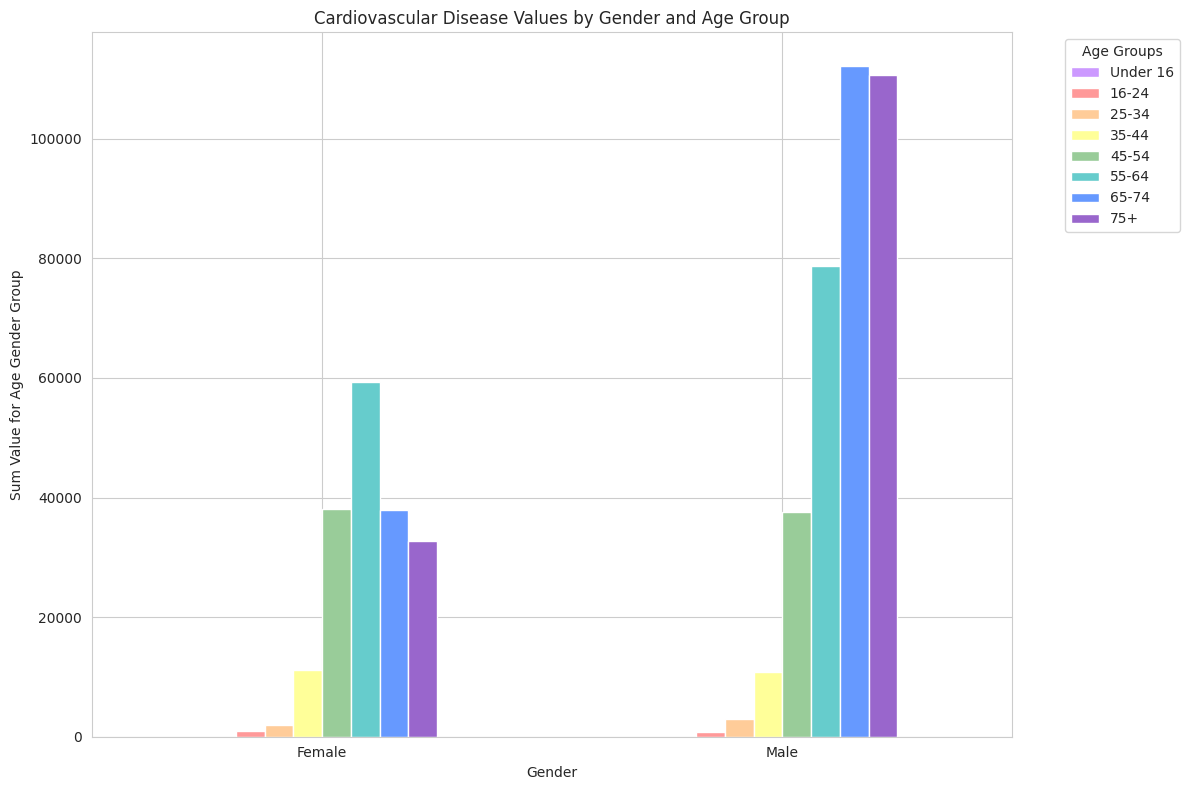

In [29]:
cardiovascular_grouped_data = cardiovascular.groupby(['Metric_Tertiary', 'Metric_Quaternary']).sum()['sum_value_for_age_gender_group'].unstack()

# Reorder columns to bring 'Under 16' to the front
age_group_order = ['Under 16', '16-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
cardiovascular_grouped_data = cardiovascular_grouped_data[age_group_order]

# Define colors for each age group
colors = ['#CC99FF','#FF9999', '#FFCC99', '#FFFF99', '#99CC99', '#66CCCC', '#6699FF', '#9966CC']

# Plotting with specified color palette
cardiovascular_grouped_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Cardiovascular Disease Values by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Sum Value for Age Gender Group')
plt.xticks(rotation=0)
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the graph above, we see that:


*  For both genders, admissions increase with age, but the rise is more drastic in males.
*   Male admissions are signifcantly higher then female admissions, especially in the older age groups.
*   The `55-64` age group for females and the `65-74` and `75+` for males show the highest admission rates.






##Mental and behavioural disorders due to use of alcohol

In [30]:
#filter dataframe
mental = age_gender_df[age_gender_df['Metric_Primary'] == 'Mental and behavioural disorders due to use of alcohol']
print(mental)

                                        Metric_Primary Metric_Tertiary  \
5    Mental and behavioural disorders due to use of...            Male   
18   Mental and behavioural disorders due to use of...          Female   
42   Mental and behavioural disorders due to use of...          Female   
86   Mental and behavioural disorders due to use of...            Male   
101  Mental and behavioural disorders due to use of...          Female   
103  Mental and behavioural disorders due to use of...          Female   
115  Mental and behavioural disorders due to use of...          Female   
119  Mental and behavioural disorders due to use of...          Female   
124  Mental and behavioural disorders due to use of...            Male   
126  Mental and behavioural disorders due to use of...          Female   
132  Mental and behavioural disorders due to use of...          Female   
142  Mental and behavioural disorders due to use of...            Male   
173  Mental and behavioural disorders 

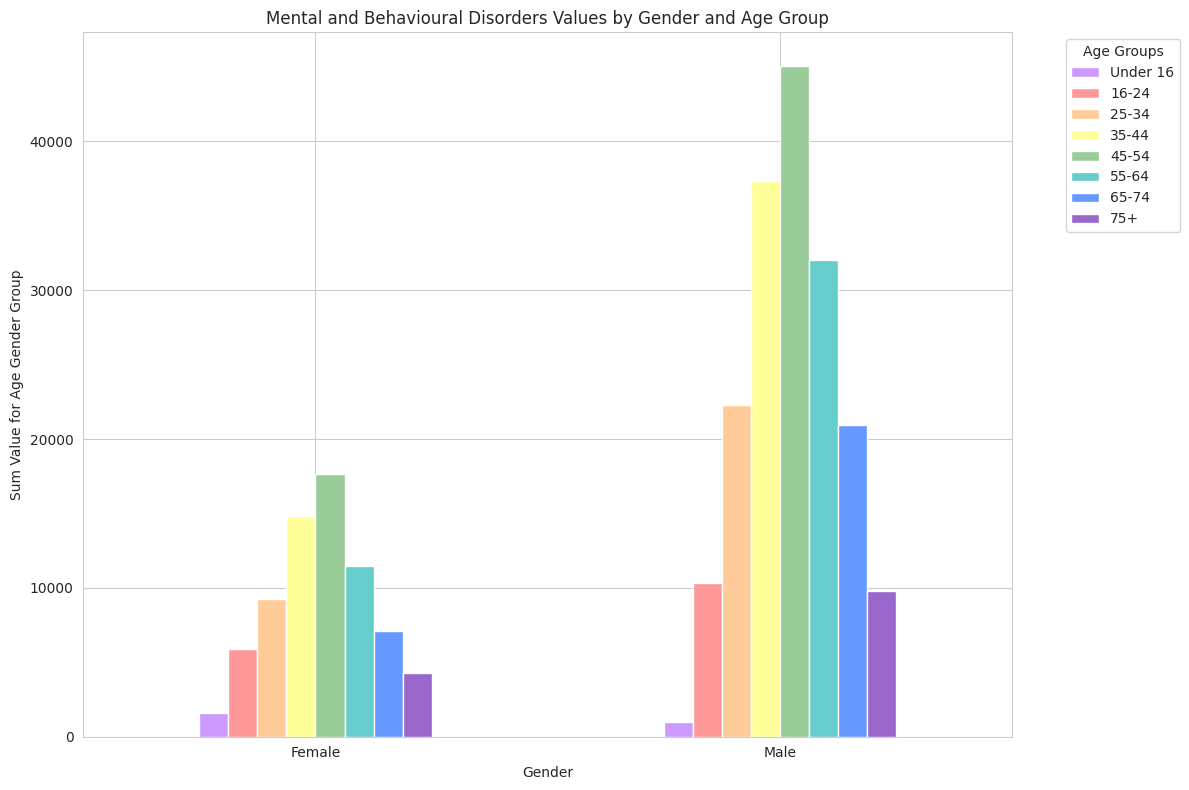

In [31]:
mental_grouped_data = mental.groupby(['Metric_Tertiary', 'Metric_Quaternary']).sum()['sum_value_for_age_gender_group'].unstack()

# Reorder columns to bring 'Under 16' to the front
age_group_order = ['Under 16', '16-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
mental_grouped_data = mental_grouped_data[age_group_order]

# Define colors for each age group
colors = ['#CC99FF','#FF9999', '#FFCC99', '#FFFF99', '#99CC99', '#66CCCC', '#6699FF', '#9966CC']

# Plotting with specified color palette
mental_grouped_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Mental and Behavioural Disorders Values by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Sum Value for Age Gender Group')
plt.xticks(rotation=0)
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on the graph, we observe that:


*   Admissions for both genders tend to increase from the `Under 16` to `45-54` age groups, before declining.
*   Admissions peak in the `45-54` age group for both genders.
*   Males in the `25-34` age group show significantly higher admission rates than female of the same age group.



# The Scientific Approach Toward Genders

Although the graphs show that females have more admissions than men, let's test if there is a significant difference. We can approach this by testing hypotheses using Python code.


In [22]:
# Filter the DataFrame to separate Male and Female groups
male_group = region_df[region_df['Metric_Primary'] == 'Male']
female_group = region_df[region_df['Metric_Primary'] == 'Female']

# Compute the mean value for each group
male_mean = male_group['sum_value_per_region'].mean()
female_mean = female_group['sum_value_per_region'].mean()

# Perform one-tailed t-test
t_statistic, p_value = stats.ttest_ind(female_group['sum_value_per_region'], male_group['sum_value_per_region'], alternative='less')

# Define significance level
alpha = 0.05

# Print mean values and t-test results
print("Mean value of Male group:", male_mean)
print("Mean value of Female group:", female_mean)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check if p-value is less than alpha to reject null hypothesis
if p_value < alpha:
    print("Reject null hypothesis: There is enough evidence to support that the mean value of Female group is less than the mean value of Male group.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to support that the mean value of Female group is less than the mean value of Male group.")


Mean value of Male group: 230487.5
Mean value of Female group: 129852.5
t-statistic: -0.850219453083461
p-value: 0.20096897210276726
Fail to reject null hypothesis: There is not enough evidence to support that the mean value of Female group is less than the mean value of Male group.


**Interpretation of Hypothesis Test Results:**

The hypothesis test failed to reject the null hypothesis. With a p-value of 20% and a t-statistic of -0.85, there is a high probability that the null hypothesis is true.

This suggests that although we observed a higher mean value for the male group, the evidence from the hypothesis test does not support the conclusion that the mean value of the female group is less than the mean value of the male group. The results indicate that there is insufficient evidence to conclude that there is a significant difference between the mean values of the female and male groups.


# Number of Administrators per Age Group

To investigate the number of administrators for each age group, we can follow these steps:

1. **showing the Number of Administrators**: Calculate the total number of administrators for each age group.
2. **Statistical Analysis**: Perform statistical tests, if applicable, to compare the number of administrators between different age groups.

We can implement this analysis using Python code, filtering the DataFrame to separate each age group, computing the total number of administrators for each group, and optionally performing statistical tests to compare the results.


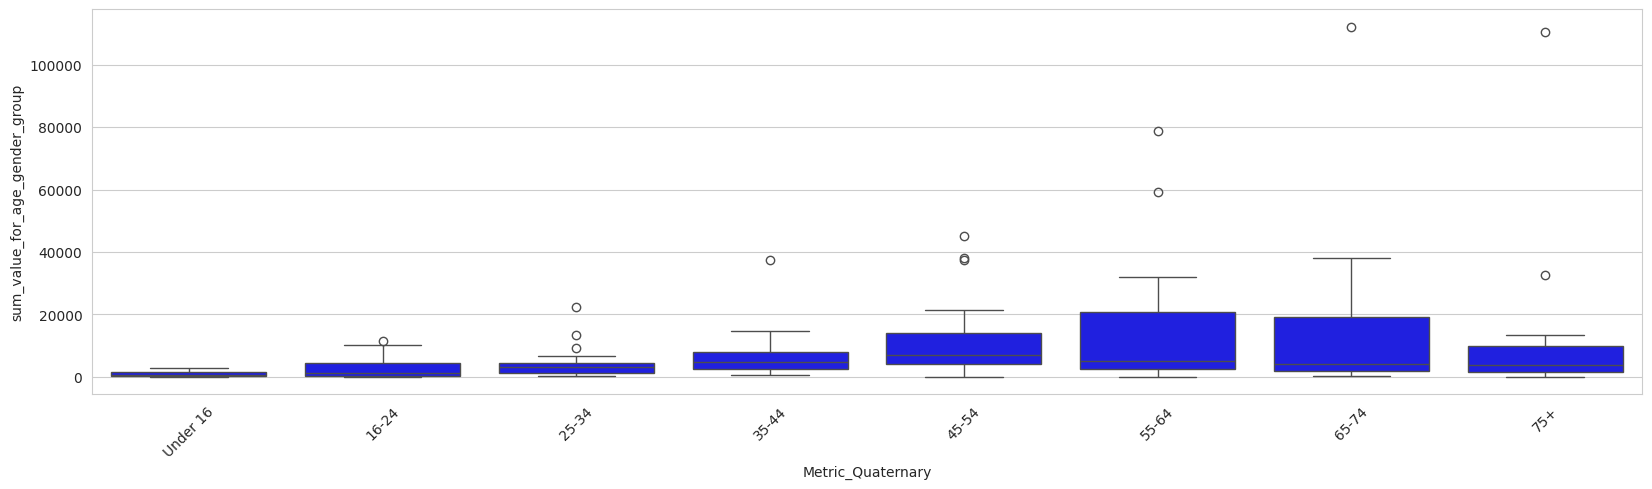

In [23]:
# Define the order of age groups
age_order = ['Under 16', '16-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

plt.figure(figsize=(20, 5))  # Adjust the size as needed

# Create the box plot
sns.boxplot(x=age_gender_df['Metric_Quaternary'],
            y=age_gender_df['sum_value_for_age_gender_group'],
            order=age_order)  # Specify the order of hue categories

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Information from Boxplot Analysis

From the boxplot analysis, we observe the following:

- Middle-aged people tend to have more hospital admissions compared to younger age groups.
- The peak admissions occur in the age group of 55-64 years.
- Older people show higher variability in admissions, indicating potential health issues or increased vulnerability.
- There is a trend of increasing admissions with age, suggesting that older individuals tend to have more hospital visits
- there is a  minimal number of patients for under the 16

# side effects and age group
To determine which side effect has the highest number of occurrences for each age group, we need to perform an analysis. We'll test for each age group to identify the side effect with the highest number of occurrences.



In [24]:
age_reason_df = spark.sql(""" with  lib as

      ( SELECT
        Metric_Quaternary,
        Metric_Primary ,
        sum(Value) as sum_values_age
    FROM
        age_gender
    WHERE
        Metric_Quaternary != 'All ages'
        AND Metric_Tertiary = 'All persons'

    GROUP BY
        Metric_Quaternary,
        Metric_Primary),

    lib2 AS (
    select Metric_Quaternary,max(sum_values_age) as max_sum_values_age

    from lib

    GROUP BY Metric_Quaternary
)

    select lib.Metric_Quaternary,lib.sum_values_age ,lib.Metric_Primary

    from lib,lib2

    where lib.Metric_Quaternary ==lib2.Metric_Quaternary and lib.sum_values_age=lib2.max_sum_values_age

""")

age_reason_df = age_reason_df.toPandas()
age_reason_df

,Metric_Quaternary,sum_values_age,Metric_Primary
0,45-54,75740.0,Cardiovascular disease
1,55-64,138150.0,Cardiovascular disease
2,75+,143360.0,Cardiovascular disease
3,35-44,52140.0,Mental and behavioural disorders due to use of...
4,Under 16,5810.0,Pregnancy and childbirth
5,25-34,31550.0,Mental and behavioural disorders due to use of...
6,16-24,16400.0,Intentional injuries
7,65-74,150100.0,Cardiovascular disease
